####Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pylab as plt

####Reading the image

In [ ]:
img = cv2.imread('for_kernal_TEM_image.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
img

array([[4, 3, 1, ..., 2, 2, 2],
       [3, 3, 1, ..., 2, 2, 2],
       [3, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 1, 1, 1]], dtype=uint8)

In [ ]:
print(f'A 10*10 part of the image : \n')
for i in range(10):
  for j in range(10):
    print(img[i][j], end = " ")
  print("")


A 10*10 part of the image : 

4 3 1 0 0 1 3 4 4 4 
3 3 1 1 1 1 3 3 4 4 
3 2 2 1 1 2 2 3 4 4 
2 2 2 2 2 2 2 2 3 3 
2 2 2 2 2 2 2 2 3 3 
1 2 2 3 3 2 2 1 2 2 
1 1 3 3 3 3 1 1 2 2 
0 1 3 4 4 3 1 0 2 2 
2 2 2 2 2 2 2 2 2 2 
2 2 2 2 2 2 2 2 2 2 


In [ ]:
img.shape

(892, 892)

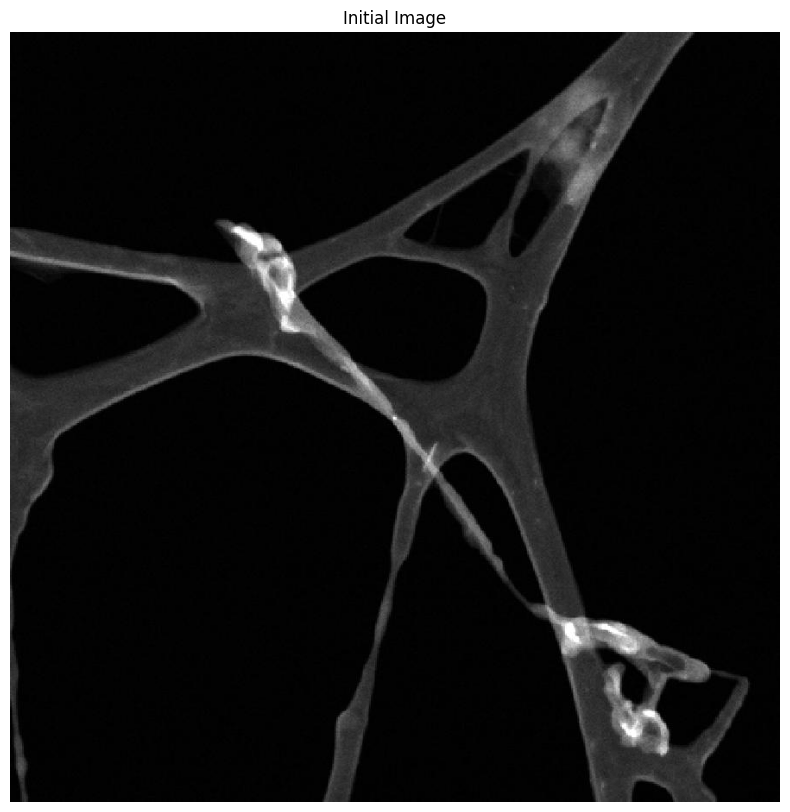

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img, cmap='gray')
ax.axis('off')
ax.set_title('Initial Image')
plt.show()

####Generating a filtering kernal of 3*3 size

In [ ]:
kernel = np.ones((3,3))

In [ ]:
print(kernel)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


####Imposing the kernel on image

In [ ]:
def isValid(i,j,height,width):
  return i>=0 and i<height and j>=0 and j<width

def filterKernel(i,j,image,width,height,kernel,n):
  result = 0
  reach = int(n/2)
  x = i-reach ; y = j-reach  # Indices of the leftmost point in the kernel neighbourhood for a point (i,j)
  cnt = 0;  # Stores the number of valid neighbors
  for i0 in range(n):
    for j0 in range(n):
      if isValid(x+i0,y+j0,height,width):
        result += kernel[i0][j0] * image[x+i0][y+j0]
        cnt += 1
  return result/cnt

In [ ]:
# Function to apply a n*n filter on a image
def filterImage(image,width,height,kernel,n):
  filteredImage = np.zeros((height,width))
  for i in range(height):
    for j in range(width):
      filteredImage[i][j] = filterKernel(i,j,image,width,height,kernel,n)

  return filteredImage

In [ ]:
filteredImage = filterImage(img,img.shape[0],img.shape[1],kernel,kernel.shape[0])

In [ ]:
filteredImage

array([[3.25      , 2.5       , 1.5       , ..., 2.        , 2.        ,
        2.        ],
       [3.        , 2.44444444, 1.55555556, ..., 2.        , 2.        ,
        2.        ],
       [2.5       , 2.22222222, 1.77777778, ..., 2.        , 2.        ,
        2.        ],
       ...,
       [2.        , 2.        , 2.        , ..., 2.        , 2.        ,
        2.        ],
       [2.        , 2.        , 2.        , ..., 1.66666667, 1.66666667,
        1.66666667],
       [2.        , 2.        , 2.        , ..., 1.5       , 1.5       ,
        1.5       ]])

In [ ]:
print(f'A 10*10 part of the filtered image : \n')

# Round the larger matrix to 2 decimal places
rounded_matrix = np.round(filteredImage, decimals=2)

# Extract and print the 10x10 submatrix
for i in range(10):
    row_str = " ".join(f"{cell:3.2f}" for cell in rounded_matrix[i][:10])
    print(row_str)

A 10*10 part of the filtered image : 

3.25 2.50 1.50 0.67 0.67 1.50 2.50 3.50 3.83 3.67
3.00 2.44 1.56 0.89 0.89 1.56 2.44 3.33 3.78 3.67
2.50 2.22 1.78 1.44 1.44 1.78 2.22 2.89 3.33 3.44
2.17 2.11 1.89 1.78 1.78 1.89 2.11 2.56 3.00 3.11
1.83 1.89 2.11 2.22 2.22 2.11 1.89 2.11 2.33 2.56
1.50 1.78 2.22 2.56 2.56 2.22 1.78 1.78 2.00 2.22
1.00 1.56 2.44 3.11 3.11 2.44 1.56 1.33 1.56 2.00
1.17 1.67 2.33 2.89 2.89 2.33 1.67 1.44 1.67 2.00
1.50 1.78 2.22 2.56 2.56 2.22 1.78 1.67 1.78 2.00
2.00 2.00 2.00 2.00 2.00 2.00 2.00 2.00 2.00 2.00


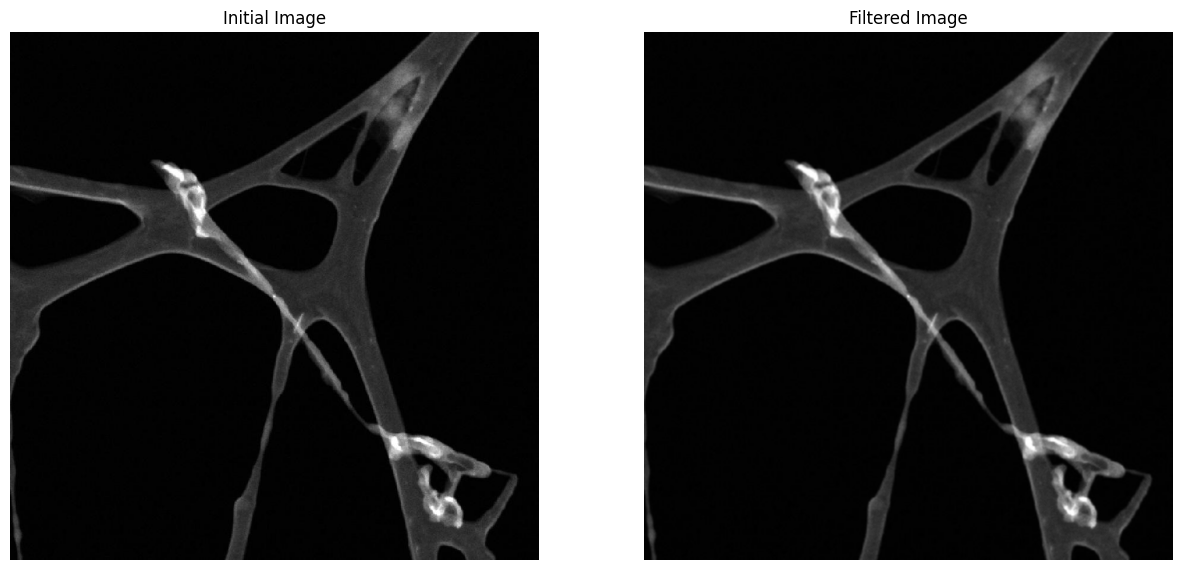

In [ ]:
fig ,axs = plt.subplots(1,2,figsize=(15,15))
axs[0].imshow(img, cmap='gray')
axs[1].imshow(filteredImage, cmap='gray')

axs[0].axis('off')
axs[1].axis('off')

axs[0].set_title('Initial Image')
axs[1].set_title('Filtered Image')
plt.show()